### Pyber  Analysis

* Urban cities had the greatest number of rides (68.4%), drivers (80.9%) and total fares (62.7%) of the three types of       cities.
* Rural cities had the lowest number of rides (5.3%), drivers (2.6%) and total fares (6.8%) of the three types of cities.
* The average fares of rides in urban cities are lower than suburban and rural cities.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how="left", on="city")
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

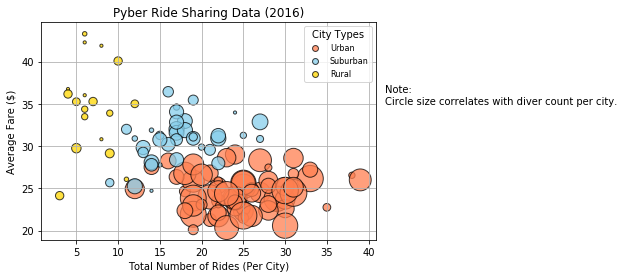

In [2]:
# caculate total rides
ride_count = combined_df.groupby("city")["ride_id"].count()

# get the numbers of drivers of each city
driver_count = combined_df.groupby("city")["driver_count"].mean()

# average fare per city
avg_fare = combined_df.groupby("city")["fare"].mean()

# get city type data
city_type = combined_df.drop_duplicates("city", keep="first").set_index("city")["type"]

# build dataframe from the above data
df = pd.DataFrame({"Number of rides": ride_count, 
                   "Number of drivers": driver_count, 
                   "Average fare": avg_fare, 
                   "Type": city_type})

# color dictionary
colors = {"Urban": "Coral", "Suburban": "SkyBlue", "Rural": "Gold"}

# Build the scatter plots for each city types
urban_group = df.loc[df["Type"] == "Urban"]
suburban_group = df.loc[df["Type"] == "Suburban"]
rural_group = df.loc[df["Type"] == "Rural"]

plt.scatter(urban_group["Number of rides"], urban_group["Average fare"], 
            marker="o", facecolors=colors["Urban"], edgecolors="black", 
            s=urban_group["Number of drivers"]*10, alpha=0.75, label="Urban")
plt.scatter(suburban_group["Number of rides"], suburban_group["Average fare"], 
            marker="o", facecolors=colors["Suburban"], edgecolors="black", 
            s=suburban_group["Number of drivers"]*10, alpha=0.75, label="Suburban")
plt.scatter(rural_group["Number of rides"], rural_group["Average fare"], 
            marker="o", facecolors=colors["Rural"], edgecolors="black",
            s=rural_group["Number of drivers"]*10, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types", loc="upper right", fontsize=8)
#change the marker size 
lgnd.legendHandles[0]._sizes = [35]
lgnd.legendHandles[1]._sizes = [35]
lgnd.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with diver count per city.")

# Save Figure
plt.savefig("Bubble_Plot_of_Ride_Sharing_Data.png")

# show Figure
plt.show()

## Total Fares by City Type

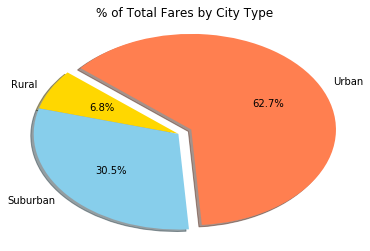

In [3]:
# Calculate total fares of each city type
fare_type = combined_df.groupby("type")["fare"].sum()

# Build Pie Chart
labels = fare_type.index
pie_colors = [colors[x] for x in labels]
explode = [0, 0, 0.1]
plt.pie(fare_type, explode=explode, labels=labels, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("Total_Fares_by_City_Type.png")

# show Figure
plt.show()

## Total Rides by City Type

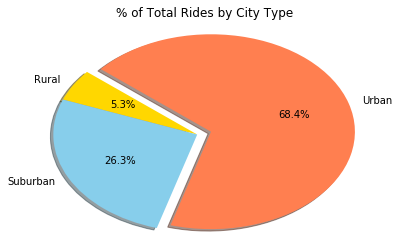

In [4]:
# Calculate Ride Percents

ride_type = combined_df.groupby("type")["ride_id"].count()

# Build Pie Chart
labels = ride_type.index
pie_colors = [colors[x] for x in labels]
explode = [0, 0, 0.1]
plt.pie(ride_type, explode=explode, labels=labels, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

# show Figure
plt.show()

## Total Drivers by City Type

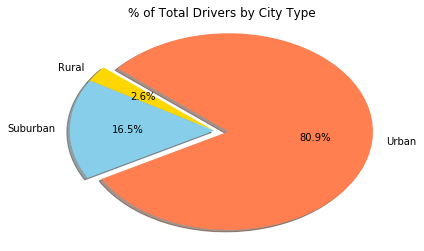

In [5]:
# Calculate Driver Percents
clean_data = combined_df.drop_duplicates("city", keep="first")
driver_type = clean_data.groupby("type")["driver_count"].sum()

# Build Pie Chart
labels = driver_type.index
pie_colors = [colors[x] for x in labels]
explode = [0, 0, 0.1]
plt.pie(driver_type, explode=explode, labels=labels, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.axis("auto")

# Save Figure
plt.savefig("Total_Drivers_by_City_Type.png")

# show Figure
plt.show()